# Những vụ tự sát và vấn đề gia đình tại Ấn Độ

Họ tên: Nguyễn Minh Tâm

MSSV: 1712746

Ý tưởng tham khảo: [amulya9 notebook](https://www.kaggle.com/amulya9/data-analysis-of-suicides-in-india)  
Phần tham khảo: Vẽ bảng với [seaborn](https://seaborn.pydata.org)  
  
  
Rmarkdown script using data from [Suicides in India](https://www.kaggle.com/rajanand/suicides-in-india)  
National Crime Records Bureau (NCRB), Govt of India has shared this [dataset](https://data.gov.in/dataset-group-name/accidental-deaths-and-suicides) under [Govt. Open Data License - India](https://data.gov.in/government-open-data-license-india).
NCRB has also shared the historical data on their website

In [1]:
#import
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Khám phá dữ liệu bao quát

In [2]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [4]:
df.dtypes

State        object
Year          int64
Type_code    object
Type         object
Gender       object
Age_group    object
Total         int64
dtype: object

In [5]:
# get real type of data
def open_object_dtype(s):
    dtypes = set()
    for item in s:
        item_type = type(item);
        if(item_type not in dtypes):
            dtypes.add(item_type)
    return dtypes

for col in df.columns:
    print(open_object_dtype(col))

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}


##### Vì hài lòng với data nên sẽ không tiền xử lý data

## Tiếp tục khám phá dữ liệu

Em sẽ vừa khám phá dữ liệu và từ những khám phá đưa ra những câu hỏi


### Tìm hiểu các cột

In [6]:
print("Numnber of state ", len(df["State"].unique()))
print("Year from ", df["Year"].min(), " to ", df["Year"].max())
print("Type_code: ", df["Type_code"].unique())
print("Number of type ", len(df["Type"].unique()))

Numnber of state  38
Year from  2001  to  2012
Type_code:  ['Causes' 'Education_Status' 'Means_adopted' 'Professional_Profile'
 'Social_Status']
Number of type  69


Type sẽ thuộc Type_code, ví dụ trên cell `df.head()` ta thấy `Type_code="Causes"` thì `Type="Illness (Aids/STD)"` tức là lý do tự tử là do bị bệnh Aids/STD  
Ta sẽ làm việc nhiều với cột Type_code nên sẽ lấy ra những dataframe từ những cột này này

In [7]:
eduDf = df[df['Type_code']=='Education_Status']
causesDf = df[df['Type_code']=='Causes']
meansDf = df[df['Type_code']=='Means_adopted']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

### Những thống kê cơ bản

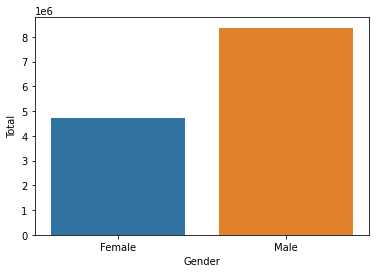

In [8]:
genderDf = df.groupby('Gender', as_index=False).sum()
sns.barplot(x='Gender',y='Total',data=genderDf)

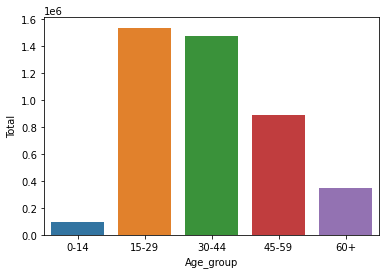

In [9]:
ageDf = df[df['Age_group']!='0-100+'].groupby('Age_group', as_index=False).sum()
sns.barplot(x='Age_group',y='Total',data=ageDf)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

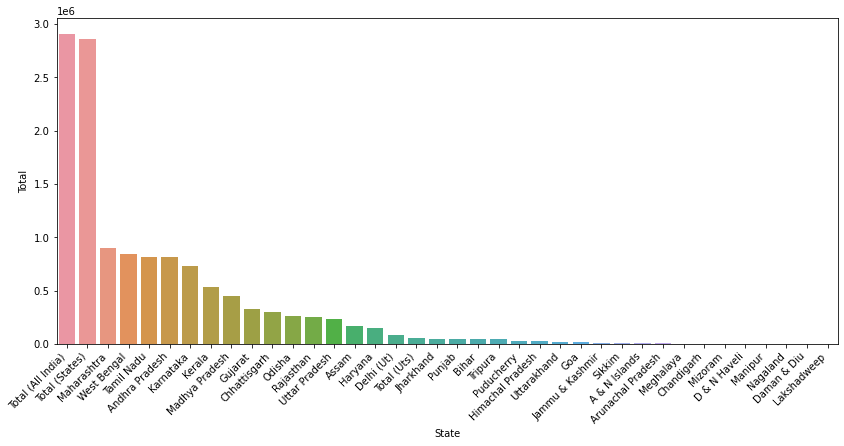

In [10]:
stateDf = df.groupby('State', as_index=False).sum().sort_values('Total',ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x='State',y='Total',data=stateDf)
plt.xticks(rotation=45,ha='right') # tên hơi dài nên rotate 45 độ là chính giữa cột là đầu phải title

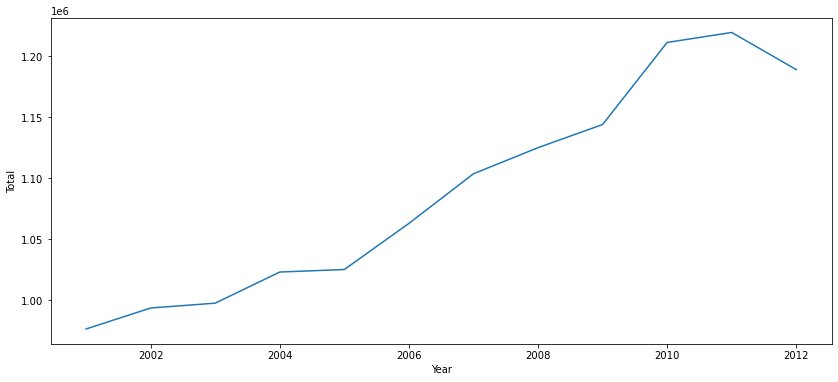

In [11]:
yearDf = df.groupby('Year', as_index=False).sum()[['Total', 'Year']]

plt.figure(figsize=(14,6))
sns.lineplot(x='Year',y='Total',data=yearDf)

##### Những điều rút ra được:
* Nam giới gần như gấp đôi số người tự tử  
* Số người tự tử khá cao đối với tuổi từ 15-44 (số tuổi lao động)  
* Số người tự tử tăng đều từ 2001 đến 2011, 2012 thì giảm. Em có research thì thấy 2012 Ấn Độ chi 2 tỷ đô chi dần đến 2020 cho [Family Planning Program (page 2)](https://www.familyplanning2020.org/sites/default/files/2017_FP2020-_India_Country-Action-Plan-2017-18_FINAL.pdf) và [RMNCH+A](https://nhm.gov.in/images/pdf/RMNCH+A/RMNCH+A_Strategy.pdf) (một chương trình bảo vệ sức khoẻ trẻ em mới sinh của WHO)


#### Thống kê số vụ tự tử ở Ấn Độ theo trình độ giáo dục và giới tính

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

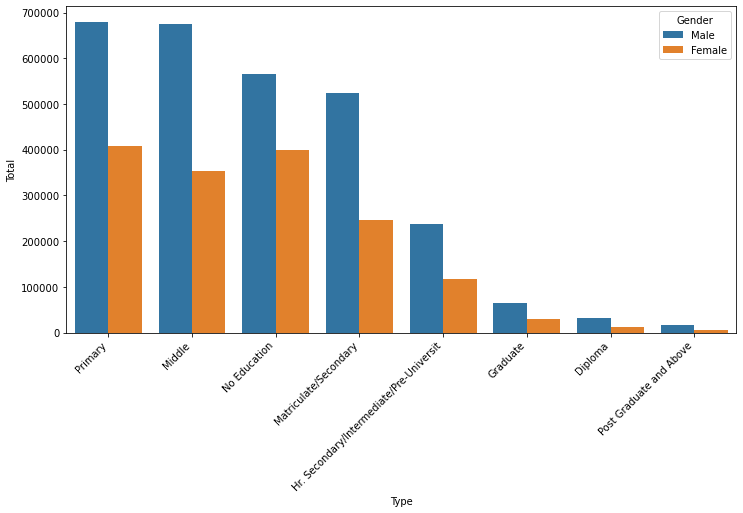

In [12]:
plt.figure(figsize=(12,6)) # default quá nhỏ
eduDf = eduDf[['Type','Gender','Total']]
edSort = eduDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False) # as_index=False cho giống SQL, 
                                                                                    # vẫn còn cột 'Type','Gender', không bị chuyển sang index
sns.barplot(x='Type',y='Total',hue='Gender',data=edSort) # hue kiểu như groupby "Gender" r vẽ 2 cột gender
plt.xticks(rotation=45,ha='right') # tên hơi dài nên rotate 45 độ là chính giữa cột là đầu phải title

Dễ dàng thấy số lượng người tự tử rất cao ở trình độ thấp so với trình độ cao. Và đúng là trẻ em ở Ấn Độ chưa được chăm sóc tốt ở thời kỳ này (số học sinh tiểu học và tự tử cao)

#### Thống kê số vụ tự tử ở Ấn Độ theo hôn nhân và giới tính

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

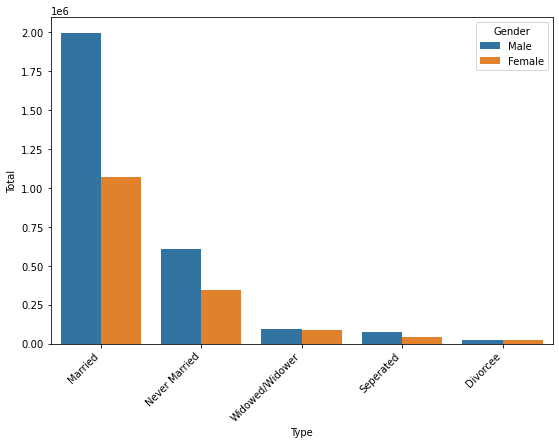

In [13]:
plt.figure(figsize=(9,6))
socialSort = socialDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=socialSort,hue='Gender')
plt.xticks(rotation=45,ha='right')

Wow, số lượng những người tự tử khi đang cưới rất cao so với phần còn lại

#### Thống kê số vụ tự tử ở Ấn Độ theo lý do tự tử và giới tính

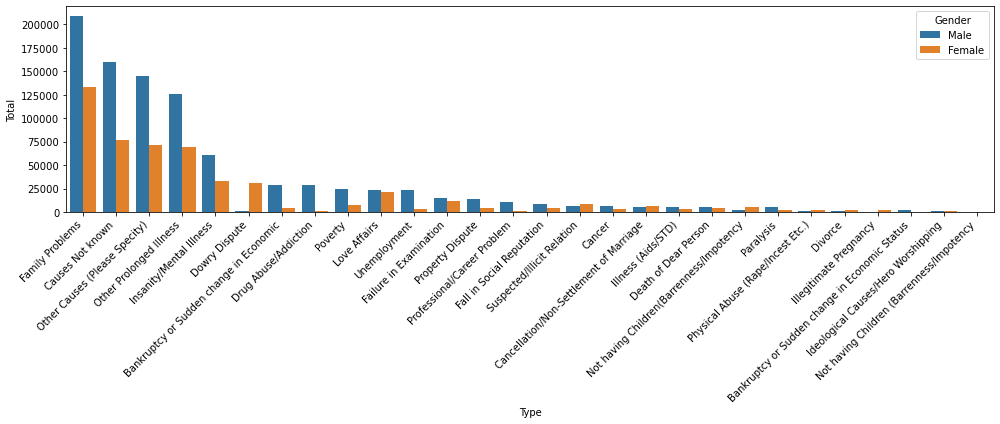

In [14]:
plt.figure(figsize=(14,6))
causesSort = causesDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=causesSort,hue='Gender')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

Ồ, ra ở Ấn Độ có rất nhiều vấn đề gia đình, ta dễ thấy đó là lý do chính người Ấn Độ tự tử, rất đúng với việc số lượng người tự tử ở Ấn Độ khi đang trong hôn nhân ở thống kê cell trên. Ngoài ra nguyên nhân bệnh tật cũng khá phổ biến

#### Thống kê số vụ tự tử ở Ấn Độ theo nghề nghiệp và giới tính

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

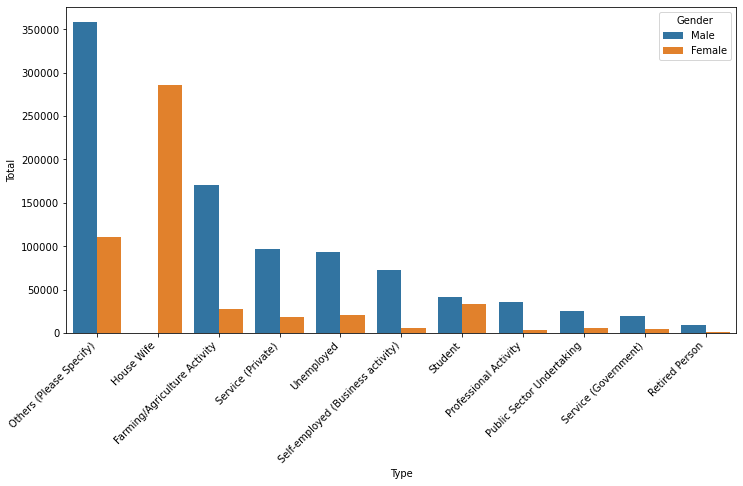

In [15]:
plt.figure(figsize=(12,6))
profSort = profDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=profSort,hue='Gender')
plt.xticks(rotation=45,ha='right')

Bất ngờ ở đây là House Wife lại là nghề mà có người tự tử cao nhất và gần như tất cả là nữ mặc dù các thống kê bên trên người tự tử là nam chiếm đa số thậm chí gấp đôi.  
Top tiếp theo là người nông dân / phục vụ / thất nghiệp và đàn ông là chiếm đa số.  
Xâu chuỗi lại có thể những người nghèo đang lo lắng cơm áo gạo tiền cho gia đình không thể chịu đựng được nên phải tự tử, chiếm phần lớn số lượng người tự tử.  

### Những câu hỏi

(Sau khi mình trả lời câu hỏi và nhận xét thì sẽ biết tại sao mình lại chọn những câu hỏi này, mình xoáy vào vấn đề gia đình tại Ấn Độ)
* Những nguyên nhân chính mà những trẻ em tự sát?  
* Những người làm nội trợ tự sát thuộc độ tuổi nào?  
* Từ năm 2011 đến năm 2012 thì số lượng tự sát giảm, thì theo phần trăm, nguyên nhân nào giảm nhiều nhất?  

### Trả lời những câu hỏi

##### Những nguyên nhân chính mà những trẻ em tự sát?  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

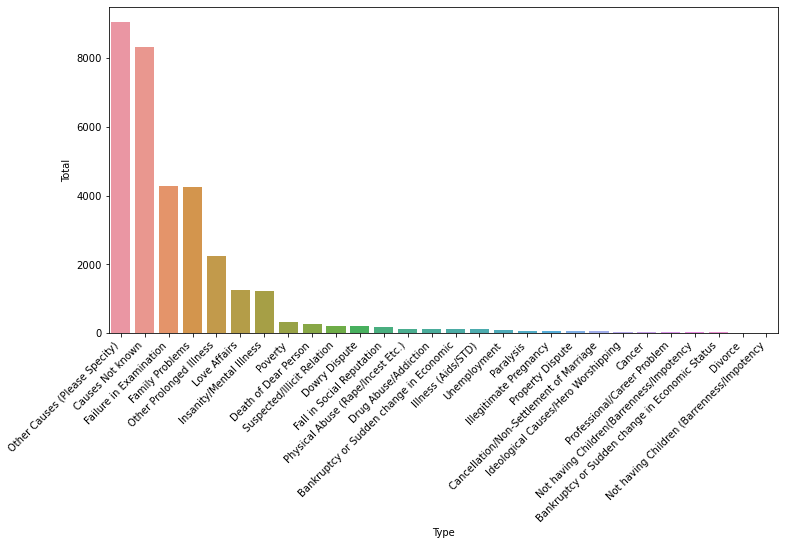

In [16]:
lowAgeDf = causesDf[causesDf["Age_group"] == "0-14"]
lowAgeSort = lowAgeDf.groupby('Type',as_index=False).sum().sort_values('Total',ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',data=lowAgeSort)
plt.xticks(rotation=45,ha='right')

Bạo lực gia đình và bệnh tật là những vấn đề chính khiến một đứa trẻ tự kết liễu cuộc đời. Ngoài ra còn do hôn nhân sớm (Love Affairs), gia đình nghèo, bị hành hung và vấn đề `Dowry Dispute`  
[Dowry Dispute](https://www.youtube.com/watch?v=M3yVVjiRCGg) nói nôm na là việc gia đình phải đưa ra một "giá tiền" cho con gái mình, khi con gái kết hôn thì phải đưa giá này cho bên gia đình chồng, nếu họ đồng ý thì mới được gả con gái và trao tiền cho bên chồng, nên nhiều gia đình có con gái không muốn điều này nên đã... hoặc tự con gái...

In [17]:
ddLowAgeDf = lowAgeDf[lowAgeDf["Type"] == "Dowry Dispute"]
ddFemale = ddLowAgeDf[ddLowAgeDf["Gender"] == "Female"]["Total"].sum()
ddMale = ddLowAgeDf[ddLowAgeDf["Gender"] == "Male"]["Total"].sum()
ddFemale / (ddMale + ddFemale)

0.9424083769633508

Thật vậy, khoảng 94% trẻ em 0-14 tự sát do Dowry Dispute là nữ :<<<

#### Những người làm nội trợ tự sát thuộc độ tuổi nào?  

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

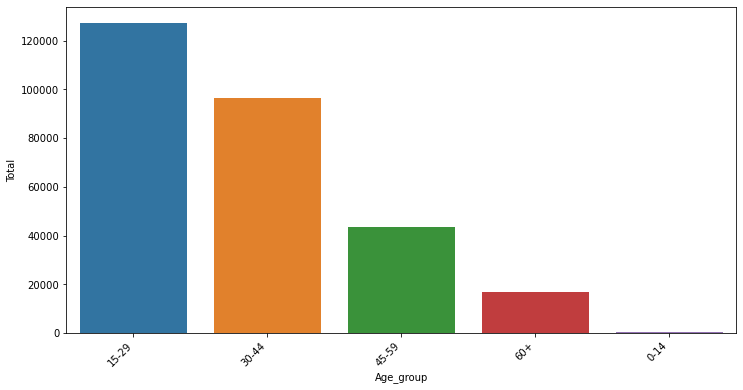

In [18]:
hwAgeDf = profDf[profDf["Type"]=="House Wife"].groupby("Age_group",as_index=False).sum().sort_values('Total',ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Age_group',y='Total',data=hwAgeDf)
plt.xticks(rotation=45,ha='right')

In [19]:
hwAgeDf

,Age_group,Year,Total
1,15-29,1685460,127415
2,30-44,1685460,96636
3,45-59,1685460,43579
4,60+,1685460,17044
0,0-14,1685460,569


Wow, 15-29 tuổi là cao nhất có vẻ hợp lý, nhưng có những người nội trợ độ tuổi từ 0-14?? Không dám chắc rằng những người này đã kết hôn. Nhưng đúng là có [kết hôn sớm](https://www.girlsnotbrides.org/child-marriage/india/) xảy ra tại Ấn Độ. Để xem những người đã kết hôn có độ tuổi bao nhiêu?

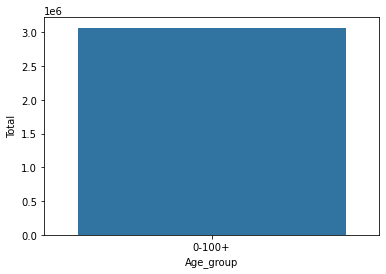

In [20]:
mAgeDf = socialDf[socialDf["Type"]=="Married"].groupby("Age_group",as_index=False).sum().sort_values('Total',ascending=False)

sns.barplot(x='Age_group',y='Total',data=mAgeDf)

Hmmm, có vẻ dữ liệu nhạy cảm.

#### Từ năm 2011 đến năm 2012 thì số lượng tự sát giảm, thì theo phần trăm, những nguyên nhân nào giảm nhiều nhất?  

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

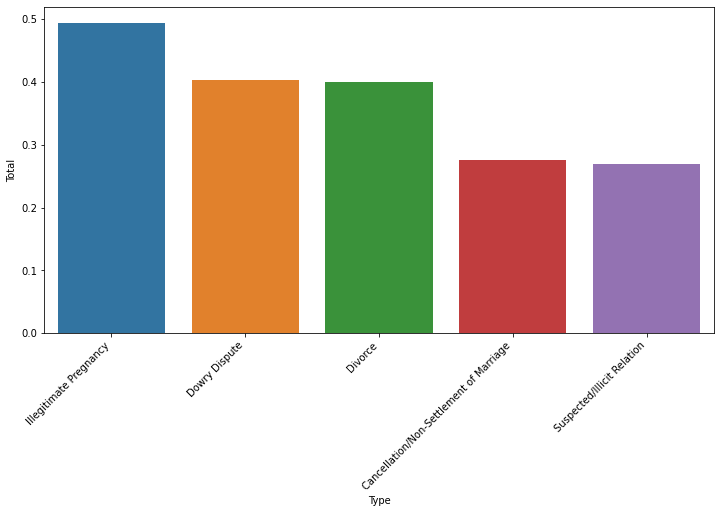

In [21]:
causes2k11Df = causesDf[causesDf["Year"] == 2011].groupby("Type",as_index=False).sum()
causes2k12Df = causesDf[causesDf["Year"] == 2012].groupby("Type",as_index=False).sum()

ratioDiffDf = ((causes2k11Df["Total"] - causes2k12Df["Total"]) * 1.0 / causes2k11Df["Total"]).to_frame()
ratioDiffDf["Type"] = causes2k11Df["Type"]

ratioShowdf = ratioDiffDf.sort_values('Total',ascending=False).iloc[0:5]

plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',data=ratioShowdf)
plt.xticks(rotation=45,ha='right')

`Illegitimate Pregnancy` sinh con ngoài ý muốn, `Dowry Dispute` đã trình bày bên trên, `Divorce` Li dị đều là những nguyên nhân gây tự tử liên quan đến vấn đề gia đình mà ở năm 2012 đã giảm gần một nửa so với 2011.  
Rõ ràng những chính sách mà Ấn Độ ở 2012 làm mà mình đã nói bên trên đã phát huy hiệu quả.  

### Nhìn lại quá trình làm notebook

* Khó khăn: chắc chỉ là tại data format `Type_code` là `Type` làm mình không thể lồng lại các `Type_code`. Ví dụ mình không thể xem trong những người tự tử tại Ấn Độ những người đã kết hôn `Type_code=='Social_Status'` đã làm nghề gì `Type_code=='Professional_Profile'`
* Những điều đã học được: Những tồn động vấn đề gia đình tại Ấn Độ, nhưng năm 2012 họ đã làm rất tốt giảm những vấn đề gia đình để số vụ tự sát giảm. Những khái niệm như `Dowry Dispute`. Vẽ bảng với seaborn
* Nếu có thời gian thì em muốn tìm hiểu về các bang ở Ấn Độ, vì không biết về luật, to hay nhỏ, những phong tục các bang này ra sao nên không sử dụng cột `State` trong notebook

Những tài liệu sử dụng mình đã link với những text mình nói